# 決定木学習

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
import matplotlib.patches as mpatches

from sklearn.model_selection import train_test_split


In [2]:
class ScratchDecesionTreeClassifierDepth1():
    """
    深さ1の決定木分類器のスクラッチ実装

    Parameters
    ----------
    verbose : bool
      学習過程を出力する場合はTrue
    """

    def __init__(self, verbose=False):
        # ハイパーパラメータを属性として記録
        self.verbose = verbose
        self.ig_max = 0
    
    def gini(self,y):
        """
        ジニ不純度を計算する。

        """
        #yをnumpy化する
        y = np.array(y)
        #yをXのサンプル数に合わせた形にする
        ind_num = y.shape[0]
        y = np.reshape(y, (ind_num, 1))

        #クラスの種類を数える
        y_ele = np.unique(y)
        y_count = len(y_ele)

        #クラスの出現頻度を数える
        y_ele_count = {}
        for i in y_ele:
            y_ele_count[i] = np.count_nonzero(y == i)


        gini = 1
        #ジニ不純度を求める
        for i in y_ele_count.values():
            gini  -= (i / ind_num)**2

        return gini
    
    def IG(self, left_array_y, right_array_y):
    
        return self.gini(y) - (left_array_y.shape[0] / y.shape[0] * self.gini(left_array_y)) - (right_array_y.shape[0] / y.shape[0] * self.gini(right_array_y))
    

    def fit(self, X, y):
        """
        決定木分類器を学習する
        Parameters
        ----------
        X : 次の形のndarray, shape (n_samples, n_features)
            学習用データの特徴量
        y : 次の形のndarray, shape (n_samples, )
            学習用データの正解値
        """
        #Xをnumpy化
        X = np.array(X)
        y = np.reshape(y,(y.shape[0],1))

        #Xとyを結合
        Xy_ndarray = np.concatenate([X,y], axis =1)

        ig_ndarray = np.reshape(np.zeros(X.shape[0]*X.shape[1]*(X.shape[1]+3)), (X.shape[0]*X.shape[1],(X.shape[1]+3)))
        for i in range(X.shape[1]):
            for j in range(X.shape[0]):
                left_array = Xy_ndarray[Xy_ndarray[:, i] < X[j,i]]
                right_array = Xy_ndarray[Xy_ndarray[:, i] >= X[j, i]]
                ig = self.IG(left_array[:,2], right_array[:,2])

                # ig_ndarray[IG, 使用した特徴量, axis, 左の葉ノードのクラス, 右の葉ノードのクラス]に記録していく

                #IGの記録
                ig_ndarray[j+(i*X.shape[0]), 0] = ig

                #使用した特徴量の記録
                ig_ndarray[j+(i*X.shape[0]), 1] = X[j, i]

                #axisの記録
                ig_ndarray[j+(i*X.shape[0]), 2] = i        

                #クラスを多数決で記録
                left_y_0 = np.count_nonzero(left_array[:,2] == 0)
                right_y_0 = np.count_nonzero(right_array[:,2] == 0)

                #左の葉ノードのクラスの多数決
                if left_y_0 > left_array.shape[0] - left_y_0:
                    ig_ndarray[j+(i*X.shape[0]), 3] = 0
                else:
                    ig_ndarray[j+(i*X.shape[0]), 3] = 1

                #右の葉ノードのクラスの多数決
                if right_y_0 > right_array.shape[0] - right_y_0:
                    ig_ndarray[j+(i*X.shape[0]), 4] = 0
                else:
                    ig_ndarray[j+(i*X.shape[0]), 4] = 1

        ig_ndarray = ig_ndarray[np.argsort(ig_ndarray[:, 0])[::-1]]
        self.ig_max = ig_ndarray[[0]]
        
        return self.ig_max


        
        """
        if self.verbose:
            #verboseをTrueにした際は学習過程を出力
            print()
        """

    def predict(self,X_test):
        X_test = np.array(X_test)
        y_pred = np.array([])
        
        self.X_ig = X_test[:, int(self.ig_max[0,2])] - self.ig_max[0,1]
            
        for i in self.X_ig:
            if i < 0:
                y_pred = np.append(y_pred,0)
            
            else:
                y_pred = np.append(y_pred,1)
        
        """
        left_array = X_test[X_test[:, int(self.ig_max[0,2])] < self.ig_max[0,1]]
        right_array = X_test[X_test[:,int(self.ig_max[0,2])] >= self.ig_max[0,1]]
        
        left_y = np.zeros((left_array.shape[0],))
        right_y = np.ones((right_array.shape[0],))
        

        
        
        left_y = np.zeros((left_array.shape[0], 1))
        right_y = np.ones((right_array.shape[0], 1))

        
        left_array_xy = np.concatenate([left_array,left_y],axis = 1)
        right_array_xy = np.concatenate([right_array,right_y],axis = 1)

        left_right = np.concatenate([left_array_xy,right_array_xy],axis = 0)
        
        
        return left_right
        """
        
        return y_pred

In [3]:
X = np.array([[-0.44699 , -2.8073  ],[-1.4621  , -2.4586  ],
       [ 0.10645 ,  1.9242  ],[-3.5944  , -4.0112  ],
       [-0.9888  ,  4.5718  ],[-3.1625  , -3.9606  ],
       [ 0.56421 ,  0.72888 ],[-0.60216 ,  8.4636  ],
       [-0.61251 , -0.75345 ],[-0.73535 , -2.2718  ],
       [-0.80647 , -2.2135  ],[ 0.86291 ,  2.3946  ],
       [-3.1108  ,  0.15394 ],[-2.9362  ,  2.5462  ],
       [-0.57242 , -2.9915  ],[ 1.4771  ,  3.4896  ],
       [ 0.58619 ,  0.37158 ],[ 0.6017  ,  4.3439  ],
       [-2.1086  ,  8.3428  ],[-4.1013  , -4.353   ],
       [-1.9948  , -1.3927  ],[ 0.35084 , -0.031994],
       [ 0.96765 ,  7.8929  ],[-1.281   , 15.6824  ],
       [ 0.96765 , 10.083   ],[ 1.3763  ,  1.3347  ],
       [-2.234   , -2.5323  ],[-2.9452  , -1.8219  ],
       [ 0.14654 , -0.28733 ],[ 0.5461  ,  5.8245  ],
       [-0.65259 ,  9.3444  ],[ 0.59912 ,  5.3524  ],
       [ 0.50214 , -0.31818 ],[-3.0603  , -3.6461  ],
       [-6.6797  ,  0.67661 ],[-2.353   , -0.72261 ],
       [ 1.1319  ,  2.4023  ],[-0.12243 ,  9.0162  ],
       [-2.5677  , 13.1779  ],[ 0.057313,  5.4681  ]])
y = np.array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1])

In [4]:
a =np.array([[0,1],
    [2,3]])


a_shape = a.shape[1]*2

b = np.reshape(a, (1,a_shape))

c = np.reshape(b, (a.shape[0], a.shape[1]))

c

array([[0, 1],
       [2, 3]])

## 分割の条件を学習で求める

## 【問題1】不純度を求める関数


In [5]:
def gini(y):
    """
    ジニ不純度を計算する。

    """
    #yをnumpy化する
    y = np.array(y)
    #yをXのサンプル数に合わせた形にする
    ind_num = y.shape[0]
    y = np.reshape(y, (ind_num, 1))

    #クラスの種類を数える
    y_ele = np.unique(y)
    y_count = len(y_ele)

    #クラスの出現頻度を数える
    y_ele_count = {}
    for i in y_ele:
        y_ele_count[i] = np.count_nonzero(y == i)
        

    gini = 1
    #ジニ不純度を求める
    for i in y_ele_count.values():
        gini  -= (i / ind_num)**2

    return gini

## 【問題2】情報利得を求める関数


In [6]:
def IG(left_array_y, right_array_y):
    
    return gini(y) - (left_array_y.shape[0] / y.shape[0] * gini(left_array_y)) - (right_array_y.shape[0] / y.shape[0] * gini(right_array_y))

## 【問題3】学習

In [7]:
def fit(X,y):

    #Xをnumpy化
    X = np.array(X)

    #Xとyを結合
    Xy_ndarray = np.concatenate([X,y], axis =1)

    ig_ndarray = np.reshape(np.zeros(X.shape[0]*X.shape[1]*(X.shape[1]+3)), (X.shape[0]*X.shape[1],(X.shape[1]+3)))
    for i in range(X.shape[1]):
        for j in range(X.shape[0]):
            left_array = Xy_ndarray[Xy_ndarray[:, i] < X[j,i]]
            right_array = Xy_ndarray[Xy_ndarray[:, i] >= X[j, i]]
            ig = IG(left_array[:,2], right_array[:,2])

            # ig_ndarray[IG, 使用した特徴量, axis, 左の葉ノードのクラス, 右の葉ノードのクラス]に記録していく

            #IGの記録
            ig_ndarray[j+(i*X.shape[0]), 0] = ig

            #使用した特徴量の記録
            ig_ndarray[j+(i*X.shape[0]), 1] = X[j, i]

            #axisの記録
            ig_ndarray[j+(i*X.shape[0]), 2] = i        

            #クラスを多数決で記録
            left_y_0 = np.count_nonzero(left_array[:,2] == 0)
            right_y_0 = np.count_nonzero(right_array[:,2] == 0)

            #左の葉ノードのクラスの多数決
            if left_y_0 > left_array.shape[0] - left_y_0:
                ig_ndarray[j+(i*X.shape[0]), 3] = 0
            else:
                ig_ndarray[j+(i*X.shape[0]), 3] = 1

            #右の葉ノードのクラスの多数決
            if right_y_0 > right_array.shape[0] - right_y_0:
                ig_ndarray[j+(i*X.shape[0]), 4] = 0
            else:
                ig_ndarray[j+(i*X.shape[0]), 4] = 1

    ig_ndarray = ig_ndarray[np.argsort(ig_ndarray[:, 0])[::-1]]
    ig_max = ig_ndarray[[0]]
    return ig_max

## 【問題4】推定


In [8]:
def predict(X_test):
        X_test = np.array(X_test)
        
        
        
        """
        left_array = X_test[X_test[:, int(ig_max[0,2])] < ig_max[0,1]]
        right_array = X_test[X_test[:,int(ig_max[0,2])] >= ig_max[0,1]]

        left_y = np.zeros((left_array.shape[0], 1))
        right_y = np.ones((right_array.shape[0], 1))

        left_array_xy = np.concatenate([left_array,left_y],axis = 1)
        right_array_xy = np.concatenate([right_array,right_y],axis = 1)

        left_right = np.concatenate([left_array_xy,right_array_xy],axis =0)
        """
        return left_right


# 検証


## 【問題5】学習と推定


In [9]:
X_train, X_test, y_train, y_test = train_test_split(X, y,train_size=0.3, random_state=0)

/Users/takamoriyuki/.pyenv/versions/anaconda3-5.3.1/lib/python3.7/site-packages/sklearn/model_selection/_split.py:2026: FutureWarning: From version 0.21, test_size will always complement train_size unless both are specified.
  FutureWarning)


In [10]:
dt = ScratchDecesionTreeClassifierDepth1()
dt.fit(X_train, y_train)
y_pred = dt.predict(X_test)

In [11]:
y_test

array([1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0,
       0, 0, 1, 0, 1, 0])

In [12]:
y_test.shape

(28,)

In [13]:
y_pred

array([1., 0., 0., 0., 0., 0., 0., 0., 1., 1., 0., 0., 1., 0., 1., 1., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0.])

In [14]:
y_pred.shape

(28,)

## 【問題6】決定領域の可視化

In [15]:

def decision_region(X, y, model, step=0.01, title='decision region', xlabel='xlabel', ylabel='ylabel', target_names=['versicolor', 'virginica']):
    """
    2値分類を2次元の特徴量で学習したモデルの決定領域を描く。
    背景の色が学習したモデルによる推定値から描画される。
    散布図の点は訓練データまたは検証データである。

    Parameters
    ----------------
    X : ndarray, shape(n_samples, 2)
        特徴量
    y : ndarray, shape(n_samples,)
        ラベル
    model : object
        学習したモデルのインスンタスを入れる
    step : float, (default : 0.1)
        推定値を計算する間隔を設定する
    title : str
        グラフのタイトルの文章を与える
    xlabel, ylabel : str
        軸ラベルの文章を与える
    target_names= : list of str
        凡例の一覧を与える
    """
    # setting
    scatter_color = ['red', 'blue']
    contourf_color = ['pink', 'skyblue']
    n_class = 2

    # pred
    mesh_f0, mesh_f1  = np.meshgrid(np.arange(np.min(X[:,0])-0.5, np.max(X[:,0])+0.5, step), np.arange(np.min(X[:,1])-0.5, np.max(X[:,1])+0.5, step))
    mesh = np.c_[np.ravel(mesh_f0),np.ravel(mesh_f1)]
    y_pred = model.predict(mesh).reshape(mesh_f0.shape)

    # plot
    plt.title(title)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.contourf(mesh_f0, mesh_f1, y_pred, n_class-1, cmap=ListedColormap(contourf_color))
    plt.contour(mesh_f0, mesh_f1, y_pred, n_class-1, colors='y', linewidths=3, alpha=0.5)
    for i, target in enumerate(set(y)):
        plt.scatter(X[y==target][:, 0], X[y==target][:, 1], s=80, color=scatter_color[i], label=target_names[i], marker='o')
    patches = [mpatches.Patch(color=scatter_color[i], label=target_names[i]) for i in range(n_class)]
    plt.legend(handles=patches)
    plt.legend()
    plt.show()

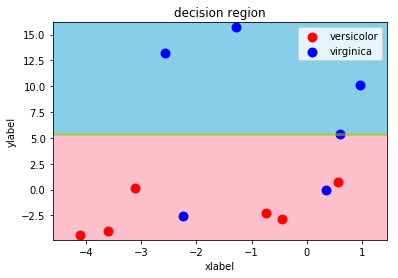

In [16]:
decision_region(X_train, y_train,dt)